# Applying the same augmentation with the same parameters to multiple images, masks, bounding boxes, or keypoints

Sometimes you want to apply the same set of augmentations to multiple input objects of the same type. For example, you might have a set of frames from the video, and you want to augment them in the same way. Or you may have multiple masks for the same image, and you want to apply the same augmentation for all of them.

In Albumentations, you can declare additional targets and their types using the `additional_targets` argument to `Compose`. 

For the name of an additional target, you can use any string value that is also a valid argument name in Python. Later, you will use those names to pass additional targets to a transformation pipeline. So you can't use a string that starts with a digit, such as `'0image'` because it is not a valid Python argument name.

The type could be either `image`, `mask`, `bboxes`, or `keypoints`.

An example definition of `Compose` that supports multiple inputs of the same type may be the following:

```
import albumentations as A

transform = A.Compose(
    [HorizontalFlip(p=0.5), ...],
    additional_targets={
        'image1': 'image',
        'image2': 'image',
        ...
        'imageN': 'image',

        'bboxes1': 'bboxes',
        'bboxes1': 'bboxes',
        ...
        'bboxesM': 'bboxes',

        'keypoints1': 'keypoints',
        'keypoints2': 'keypoints',
        ...
        'keypointsK': 'keypoints',

        'mask1': 'mask',
        'mask2': 'mask',
        ...
        'maskL': 'mask'
    })
)
```

**Note**: there is also an alternative way to apply the same augmentation to multiple inputs such as images, masks, etc.

`ReplayCompose` is a tool that could record augmentation parameters applied to one set of inputs (e.g., an image and an associated mask) and then use the recorded values to augment another set of inputs in the same way.

You can read more about `ReplayCompose` [here](https://albumentations.ai/docs/examples/replay/).

### Import the required libraries

In [1]:
import random

import cv2
from matplotlib import pyplot as plt

import albumentations as A

### Define a function to visualize an image

In [2]:
def visualize(image):
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(image)

### Load images from the disk

In [3]:
image = cv2.imread('images/multi_target_1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image0 = cv2.imread('images/multi_target_2.jpg')
image0 = cv2.cvtColor(image0, cv2.COLOR_BGR2RGB)
image1 = cv2.imread('images/multi_target_3.jpg')
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

### Show original images

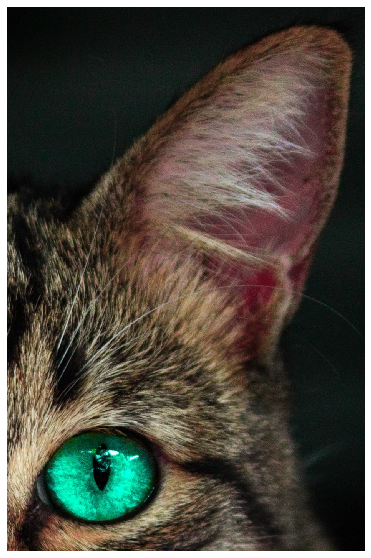

In [4]:
visualize(image)

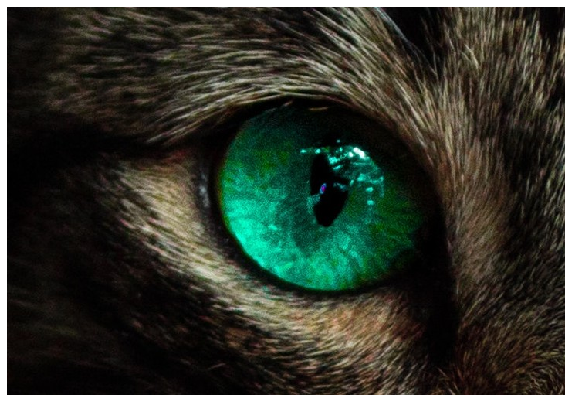

In [5]:
visualize(image0)

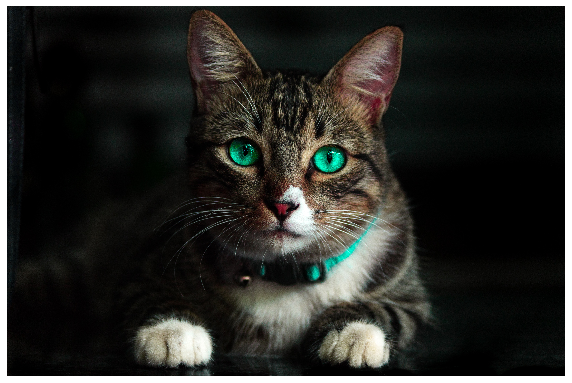

In [6]:
visualize(image1)

### Define an augmentation pipeline 

The pipeline expects three images as inputs named `image`, `image0`, and `image1`. Then the pipeline will augment those three images in the same way. So it will apply the same set of transformations with the same parameters.

In [7]:
transform = A.Compose(
    [A.VerticalFlip(p=1)],
    additional_targets={'image0': 'image', 'image1': 'image'}
)

In [8]:
transformed = transform(image=image, image0=image0, image1=image1)

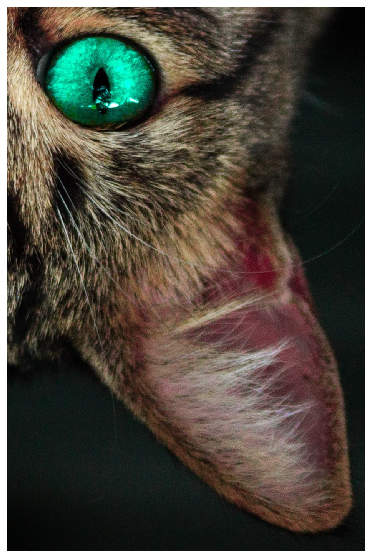

In [9]:
visualize(transformed['image'])

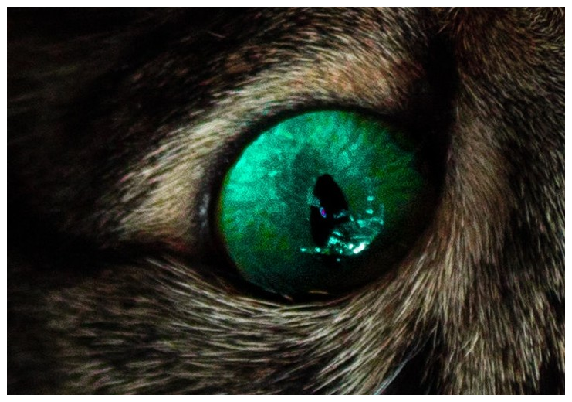

In [10]:
visualize(transformed['image0'])

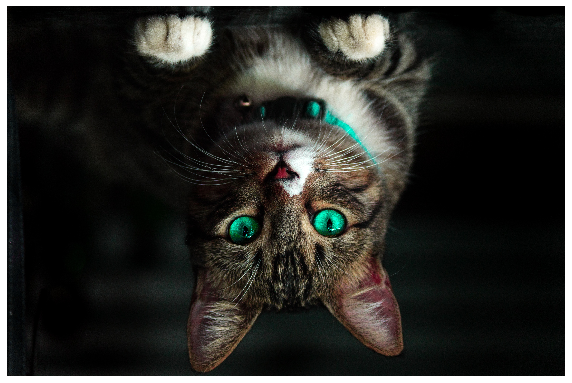

In [11]:
visualize(transformed['image1'])

## An example of more complex pipeline

In [12]:
transform = A.Compose(
    [
        A.HorizontalFlip(p=0.5),
        A.ShiftScaleRotate(p=0.5),
        A.RandomBrightnessContrast(p=0.2),
        A.RGBShift(p=0.2),
    ],
    additional_targets={'image0': 'image', 'image1': 'image'}
)

In [13]:
random.seed(42)
transformed = transform(image=image, image0=image0, image1=image1)

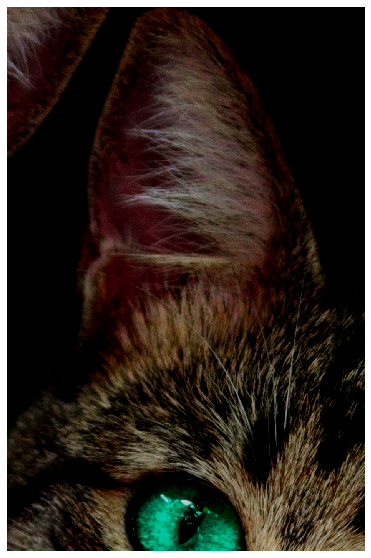

In [14]:
visualize(transformed['image'])

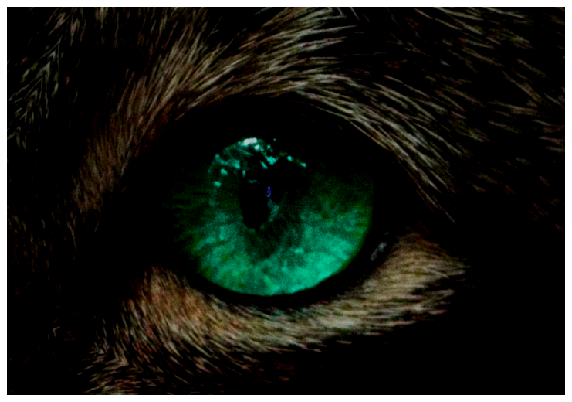

In [15]:
visualize(transformed['image0'])

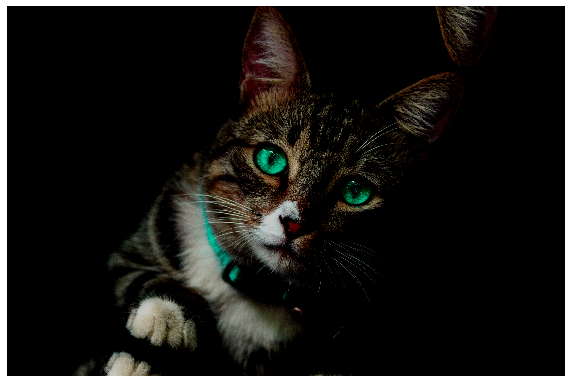

In [16]:
visualize(transformed['image1'])